# Weight of Evidence - Information Value
- [Link](https://towardsdatascience.com/churn-analysis-information-value-and-weight-of-evidence-6a35db8b9ec5)
- [Link](https://github.com/klaudia-nazarko/iv-and-woe-python)

## Imports

In [2]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns

from pandas.api.types import is_numeric_dtype
from matplotlib.colors import ListedColormap

from Features import *
from AttributeRelevance import *

## Configuration

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

## Data Preparation

In [4]:
df = pd.read_csv('datagen.csv', na_values=[' '])

In [5]:
df['label'] = df['app_status'].map({'valid': 0, 'invalid': 1})
df['browserType'] = df['browser'].map({0: 'edge', 1: 'chrome', 2: 'safari', 3: 'firefox', 4: 'opera', 5: 'vivaldi' })

df.drop(['app_id', 'app_status', 'browser', 'score'], axis=1, inplace=True)

In [6]:
df.sample(10)

,ipAddress,ipHop,timeSubmitSec,package,inList,inCust,weekDay,appHour,label,browserType
2279,"15,384.00",0.00,16.00,0.00,1.00,0,5.00,13.00,0,safari
9641,"13,636.00",3.00,1.00,13.00,1.00,1,6.00,17.00,1,firefox
4204,"21,538.00",0.00,21.00,3.00,0.00,1,5.00,14.00,0,firefox
4517,"15,384.00",0.00,15.00,0.00,0.00,1,5.00,9.00,0,chrome
3413,"6,153.00",0.00,22.00,12.00,0.00,0,5.00,8.00,0,safari
4230,"12,307.00",0.00,22.00,9.00,0.00,0,6.00,12.00,0,NaN
9776,"17,272.00",2.00,5.00,14.00,2.00,1,6.00,20.00,1,vivaldi
6518,"6,153.00",0.00,19.00,3.00,2.00,0,4.00,10.00,0,chrome
3702,"9,230.00",0.00,19.00,3.00,0.00,0,6.00,9.00,0,edge
9205,"15,454.00",1.00,2.00,14.00,3.00,0,5.00,21.00,1,vivaldi


## Data Exploration

In [7]:
def eda_categorical(data, variable, ax=None):
    variable_df = data[variable].value_counts(normalize=True).reset_index()
    n_colors = len(variable_df)
    variable_df.set_index('index').T.plot(kind='barh',
                                        stacked=True,
                                        colormap=ListedColormap(sns.color_palette("Set2", n_colors)),
                                        width=0.15, ax=ax)

def multiple_eda_categorical(data, list_categorical):
    n_rows = math.ceil(len(list_categorical)/2)
    fig = plt.figure(figsize=(12,n_rows*3))

    for i, variable in enumerate(list_categorical):
        ax = fig.add_subplot(n_rows,2,i+1)
        eda_categorical(data, variable, ax=ax)
    
    plt.tight_layout()
    plt.show()

def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set2', 3)

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=data, orient='v', palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

In [8]:
continuous, categorical = [], []
black_list = ['ipHop', 'inCust']

for col in [c for c in df.columns if c not in black_list and c != 'label']:
    if is_numeric_dtype(df[col]):
        continuous.append(col)
    else:
        categorical.append(col)

In [9]:
n = len(df)
n_invalid = sum(df['label'])
n_valid = n - n_invalid

print('Dataset contains %d records' % (n))
print('Number of invalid records: %d (%0.2f%%)' % (n_invalid, n_invalid*100/n))

Dataset contains 10000 records
Number of invalid records: 2000 (20.00%)


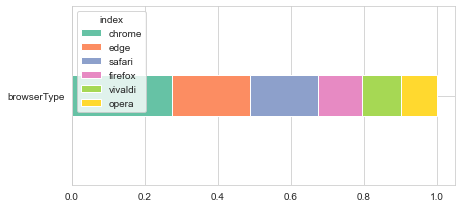

In [10]:
multiple_eda_categorical(df, categorical)

D:\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
D:\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


IndexError: list index out of range

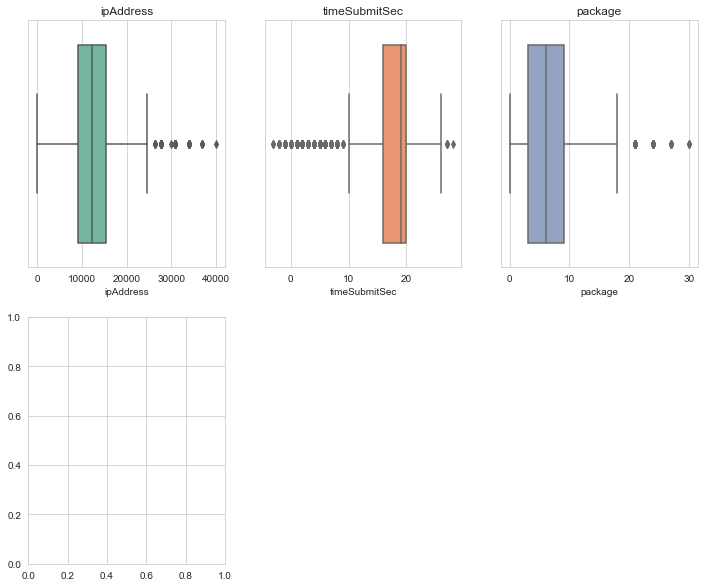

In [11]:
multiple_eda_continuous(df, continuous)

## Information Value and Weight of Evidence

Attribute relevance analysis evaluates attribute values' impact on target variable. It helps in recognizing the most important variables which have the greatest impact on target variable and understanding relations and logic between the most important predictors and the target variable.

Information value (IV) and weight of evidence (WOE) are simple and powerful techniques of conducting attribute relevance analysis. They provide a great framework for exploratory analysis and have been used extensively in the credit risk world for several decades.

**Information value**
>Information Value provides a measure of how well a variable X is able to distinguish between a binary response (e.g. "good" versus "bad") in some target variable Y. The idea is if a variable X has a low Information Value, it may not do a sufficient job of classifying the target variable, and hence is removed as an explanatory variable.

**Weight of evidence**
>The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.

**IV values interpretation**

| Information value        | Predictive power           |
| ------------- |:-------------:|
| < 0.02      | useless for prediction |
| 0.02 - 0.1      | weak predictor      |
| 0.1 - 0.3 | medium predictor      |
| 0.3 - 0.5 | strong predictor      |
| > 0.5 | suspicious or too good      |

In [ ]:
feats_dict = {}
filter_list = ['safari']

for col in [c for c in df.columns if c not in filter_list and c != 'label']:
    if is_numeric_dtype(df[col]):
        feats_dict[col] = ContinuousFeature(df, col)
    else:
        feats_dict[col] = CategoricalFeature(df, col)

feats = list(feats_dict.values())

In [ ]:
iv = IV()
s = StatsSignificance()

ar = AttributeRelevance()

## Information value analysis

Customers who churned are labeled with value 0 ('bad' customers) and those who retained with value 1 ('good' customers). It implies that positive WOE means higher probability of retention and negative WOE - higher probability of churn.

As mentioned before, the analysis was divided into 2 parts: analysis of all customers and analysis of only customers with internet service. It reveals some interesting relations:

**Suspicious predictors**

This group contains: contract, tenure and internet service. It shows that relation between values of those features and churn is very strong - so strong that it should be examined carefully. It may suggest that there is some error in the data or that explanatory and explained variables are not independent.

Analysis of 'contract' feature shows that WOE for month-to-month contracts is negative while it's very high for two year contracts. It can be explained by the fact that customers with shorter contract have many more 'churn moments' (every month they need to renew their service) than customers with long-term contracts, thus their churn rate is much higher.

**Strong predictors**

Fortunately, this group of features is quite big. It contains: payment method, total charges, online security and tech support. They show strong relation between value of the feature and churn. They can be successfully used to predict churn of the customer.

Analysis of total charges shows that customers who have already spent more than \\$678 are less likely to churn. To fully understand this relation it's good to notice that total charges is the resultant of monthly charge and the tenure. Monthly charges variable tells us that users who pay \\$18 - \\$50 monthly are less likely to churn and the risk of churn increases with the increase of monthly fee. In this case, although total charges feature has higher IV, it seems more actionable to use monthly charges and tenure variables separately.

In [ ]:
ar.analyze(feats, iv, interpretation=True)

In [ ]:
ar.draw_iv(feats, iv)

In [ ]:
ar.draw_woe_extremes(feats, iv)

In [ ]:
feats_dict_black = {}
df_black = df[df['browserType']!='vivaldi']
for b in filter_list:
    feats_dict_black[b] = CategoricalFeature(df_black, b)

feats_black = list(feats_dict_black.values())

In [ ]:
ar.analyze(feats_black, iv, interpretation=True)

## Weight of evidence analysis

Detailed examination of WOE provides interesting insights and shows some possible issues in the services offered by the company.

**Tenure vs total charges**

As mentioned before, those two features show very similar behaviour - and it is totally logical since total charges = tenure * monthly charges. It's good to have it in mind and focus more on monthly charges variable instead of total charges.

**Internet service**

Among the customers there are those who use DSL network, Fiber optic network or don't use the internet service. It's interesting to see that customers using Fiber optic are much more likely to churn - it may suggest some problems with the service.

**Payment method**

The company offers four different payment methods: bank transfer, credit card, electronic check and mailed check. The analysis shows that users who pay with electronic check are more likely to churn. In order to understand this relation it's good to check which payment methods are recurring and what are the possible issues that customers have while using electronic check.

**Additional Internet services**

The analysis of customers using Internet service shows that those who use additional services like: online security, tech support and online backup are more likely to retain.

In [ ]:
f_draw = ['ipAddress', 'timeSubmitSec', 'package', 'inList', 'weekDay', 'appHour']
feats_draw = [v for k, v in feats_dict.items() if k in f_draw]
ar.draw_woe_multiplot(feats_draw, iv)

In [ ]:
f_black_draw = ['ipAddress']
feats_black_draw = [v for k, v in feats_dict_black.items() if k in f_black_draw]
ar.draw_woe_multiplot(feats_black_draw, iv)

### Read more

- What about statistical significance? Check [**Information Value vs Statistical Significance Analysis**](https://github.com/klaudia-nazarko/iv-and-woe-python/blob/master/statistical_significance_of_information_value.ipynb).
- In order to see how Information Value module is used, check [**IV and WOE in Python**](https://github.com/klaudia-nazarko/iv-and-woe-python/blob/master/iv_and_woe_in_python.ipynb).

## Archives

In [ ]:
def get_IV(df, feature, target):
    lst = []

    # optional
    # df[feature] = df[feature].fillna("NULL")

    unique_values = df[feature].unique()
    for val in unique_values:
        lst.append([feature,                                                        # Feature name
                    val,                                                            # Value of a feature (unique)
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]   # Bad  (Fraud == 1)
                   ])
 
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'Good', 'Bad'])

        
    total_bad = df[df[target] == 1].count()[feature]
    total_good = df.shape[0] - total_bad
    
    data['Distribution Good'] = data['Good']/ total_good
    data['Distribution Bad'] = data['Bad'] / total_bad
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    iv = data['IV'].sum()

    return iv, data